In [51]:

from math import floor, ceil
import nltk
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold as skmf
import re

with pd.ExcelFile("Final LLM Metrics.xlsx") as xls:  
    data = pd.read_excel(xls, "LLM Metrics")

In [52]:
#data=data.iloc[:,]

In [53]:
data.describe()

,whisper jaccard,whisper jaro,whisper leven,whisper wer,whisper wil,whisper mer,whisper cer,nova jaccard,nova jaro,nova leven,nova wer,nova wil,nova mer,nova cer
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.850765,0.834671,429.701299,0.180219,0.207232,0.160960,0.129095,0.896950,0.852501,120.642857,0.072848,0.105453,0.070845,0.036726
std,0.075545,0.023995,287.787733,0.091569,0.094641,0.073184,0.072878,0.038529,0.018399,79.698835,0.034793,0.046303,0.032531,0.021174
min,0.610951,0.784421,8.000000,0.011820,0.016459,0.011765,0.004932,0.751515,0.826042,5.000000,0.014493,0.028775,0.014493,0.003956
25%,0.820102,0.819433,205.500000,0.107694,0.135122,0.102216,0.072539,0.878187,0.840464,69.000000,0.046571,0.071865,0.045930,0.022753
50%,0.864317,0.834736,400.000000,0.167224,0.195327,0.154352,0.116886,0.899728,0.846802,102.000000,0.067437,0.099674,0.066339,0.032004
75%,0.904896,0.846441,554.750000,0.229333,0.251739,0.211237,0.174334,0.922928,0.858765,152.250000,0.092837,0.136133,0.090041,0.046387
max,0.985366,0.934636,1465.000000,0.493431,0.483315,0.366594,0.354375,0.973154,0.950346,466.000000,0.222222,0.297765,0.204506,0.136062


In [54]:
data

,file name,whisper jaccard,whisper jaro,whisper leven,whisper wer,whisper wil,whisper mer,whisper cer,nova jaccard,nova jaro,nova leven,nova wer,nova wil,nova mer,nova cer
0,Student 001.mp3,0.979730,0.921699,15,0.024155,0.033722,0.024155,0.011867,0.973154,0.950346,5,0.014493,0.028775,0.014493,0.003956
1,Student 002.mp3,0.777049,0.823683,506,0.199288,0.235604,0.191126,0.153753,0.951049,0.847246,48,0.028470,0.042249,0.028269,0.014585
2,Student 003.mp3,0.889262,0.830518,388,0.164154,0.194205,0.150307,0.115890,0.877888,0.840369,177,0.092127,0.140778,0.089723,0.052867
3,Student 004.mp3,0.850467,0.834833,107,0.078550,0.115714,0.078078,0.054287,0.863850,0.863188,45,0.063444,0.097625,0.062874,0.022831
4,Student 005.mp3,0.832700,0.839760,210,0.168766,0.228268,0.163415,0.085297,0.861004,0.864889,103,0.105793,0.152936,0.103448,0.041836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Student 150.mp3,0.898876,0.823783,273,0.146237,0.172747,0.134122,0.100331,0.905660,0.885268,103,0.075269,0.114930,0.073069,0.037854
150,Student 151.mp3,0.906627,0.844655,163,0.088235,0.127743,0.087237,0.043983,0.921922,0.886364,69,0.053922,0.085384,0.052885,0.018618
151,Student 152.mp3,0.743056,0.819907,1465,0.369318,0.426225,0.316456,0.277989,0.856459,0.860494,267,0.098864,0.142267,0.095815,0.050664
152,Student 153.mp3,0.826923,0.818687,686,0.319419,0.368273,0.278041,0.220013,0.915385,0.841382,74,0.061706,0.096693,0.060606,0.023733


Text(0.5, 0, 'Similarity Range 0-1')

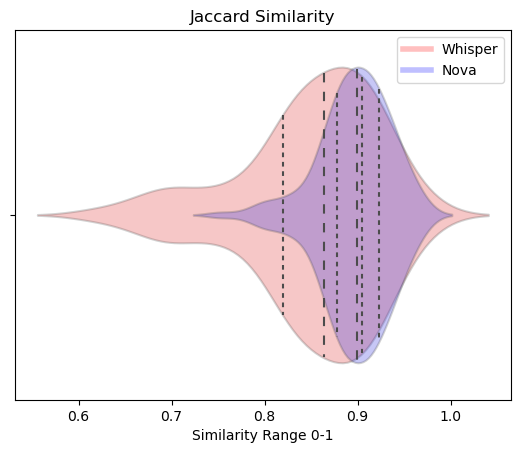

In [55]:
import seaborn as sns
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper jaccard", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova jaccard", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Jaccard Similarity")
plt.xlabel("Similarity Range 0-1")

Text(0.5, 0, 'Jaro Range 0-1')

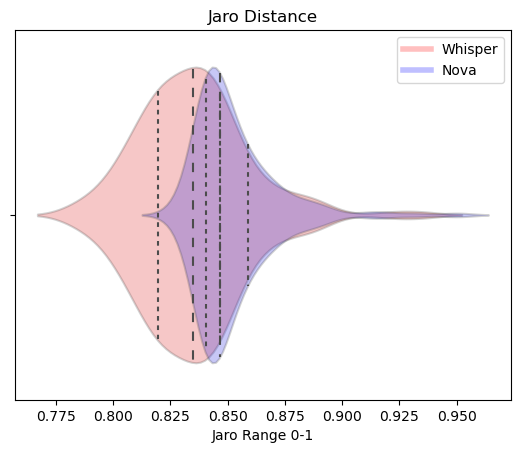

In [56]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper jaro", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova jaro", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Jaro Distance")
plt.xlabel("Jaro Range 0-1")

Text(0.5, 0, 'Levenstein 0-Infinity')

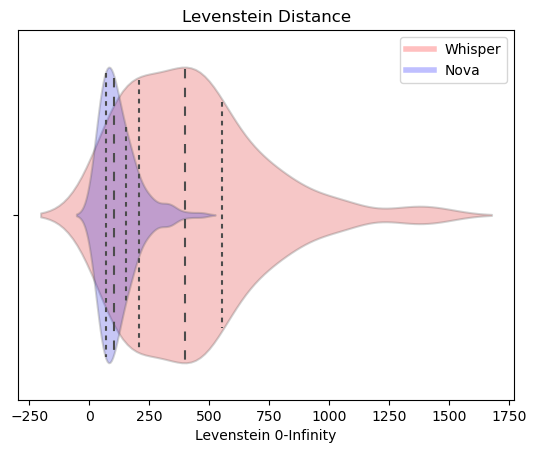

In [57]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper leven", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova leven", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Levenstein Distance")
plt.xlabel("Levenstein 0-Infinity")

Text(0.5, 0, 'Range >=0')

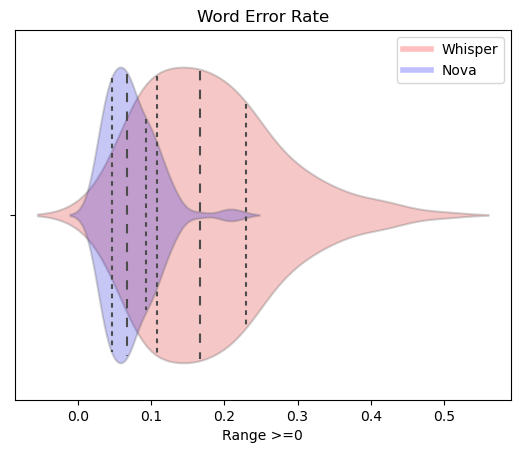

In [58]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper wer", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova wer", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Word Error Rate")
plt.xlabel("Range >=0")

Text(0.5, 0, 'Range 0-1')

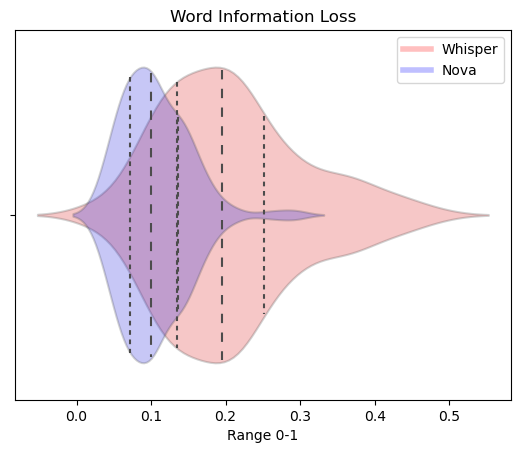

In [59]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper wil", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova wil", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Word Information Loss")
plt.xlabel("Range 0-1")

Text(0.5, 0, 'Range >=0')

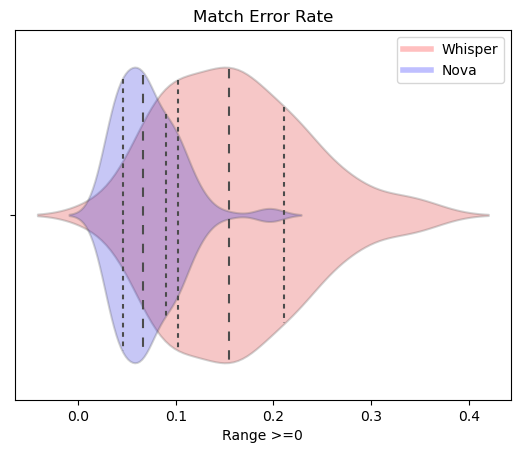

In [60]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper mer", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova mer", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Match Error Rate")
plt.xlabel("Range >=0")

Text(0.5, 0, 'Range >=0')

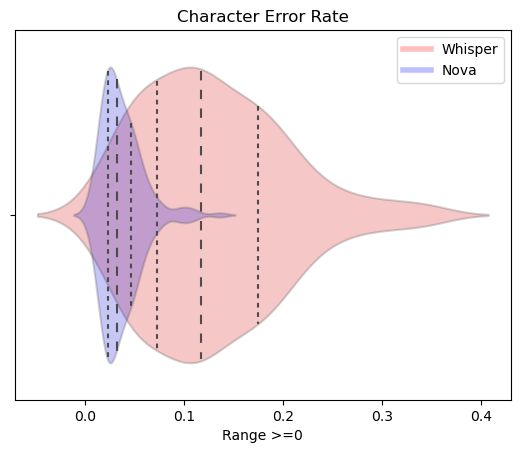

In [61]:
fig, ax = plt.subplots()
sns.violinplot(data=data,x="whisper cer", split=True, inner="quart", color = 'r')
sns.violinplot(data=data,x="nova cer", split=True, inner="quart",color = 'b' )
for violin in ax.collections:
    violin.set_alpha(0.25)

custom_lines = [
    Line2D([0], [0], color='r', lw=4, alpha=0.25,label='Whisper'),
    Line2D([0], [0], color='b', lw=4, alpha=0.25, label='Nova')
]   
ax.legend(handles=custom_lines,loc='upper right')
plt.title("Character Error Rate")
plt.xlabel("Range >=0")

In [68]:
list(data.columns)[1:]

['whisper jaccard',
 'whisper jaro',
 'whisper leven',
 'whisper wer',
 'whisper wil',
 'whisper mer',
 'whisper cer',
 'nova jaccard',
 'nova jaro',
 'nova leven',
 'nova wer',
 'nova wil',
 'nova mer',
 'nova cer']

In [72]:
from scipy import stats
for i in list(data.columns)[1:]: 
    print(i)
    print(stats.normaltest(data[i]))
    if (stats.normaltest(data[i]).pvalue < 0.5):
        print('Normal')
    print('\n')

whisper jaccard
NormaltestResult(statistic=23.005429614658315, pvalue=1.0102629642826197e-05)
Normal


whisper jaro
NormaltestResult(statistic=28.131807102826073, pvalue=7.784947795983851e-07)
Normal


whisper leven
NormaltestResult(statistic=34.03393888598065, pvalue=4.070277996629355e-08)
Normal


whisper wer
NormaltestResult(statistic=15.4307095974638, pvalue=0.00044592722195527793)
Normal


whisper wil
NormaltestResult(statistic=11.542745751473978, pvalue=0.0031154774134639638)
Normal


whisper mer
NormaltestResult(statistic=6.537497204902567, pvalue=0.038054017996222024)
Normal


whisper cer
NormaltestResult(statistic=14.234423774646501, pvalue=0.0008110248303823782)
Normal


nova jaccard
NormaltestResult(statistic=19.970025960975413, pvalue=4.6085463618857874e-05)
Normal


nova jaro
NormaltestResult(statistic=94.55586881514752, pvalue=2.933958529906002e-21)
Normal


nova leven
NormaltestResult(statistic=53.71519089691842, pvalue=2.1671775819069253e-12)
Normal


nova wer
Normaltes

In [74]:
from scipy.stats import levene


t_stat_var1, p_value_var1 = levene(data['whisper jaccard'], data['nova jaccard'])
t_stat_var2, p_value_var2 = levene(data['whisper jaro'], data['nova jaro'])
t_stat_var3, p_value_var3 = levene(data['whisper leven'], data['nova leven'])
t_stat_var4, p_value_var4 = levene(data['whisper wer'], data['nova wer'])
t_stat_var5, p_value_var5 = levene(data['whisper wil'], data['nova wil'])
t_stat_var6, p_value_var6 = levene(data['whisper mer'], data['nova mer'])
t_stat_var7, p_value_var7 = levene(data['whisper cer'], data['nova cer'])


print("\nVariable 1: Jaccard Similarity")
print("t-statistic:", t_stat_var1)
print("p-value:", p_value_var1)
if (p_value_var1 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 2: Jaro-Winkler Distance")
print("t-statistic:", t_stat_var2)
print("p-value:", p_value_var2)
if (p_value_var2 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 3: Levenshtein Distance")
print("t-statistic:", t_stat_var3)
print("p-value:", p_value_var3)
if (p_value_var3 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 4: Word Error Rate")#continuous
print("t-statistic:", t_stat_var4)
print("p-value:", p_value_var4)
if (p_value_var4 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 5: Word Information Loss")
print("t-statistic:", t_stat_var5)
print("p-value:", p_value_var5)
if (p_value_var5 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 6: Match Error Rate")#continuous
print("t-statistic:", t_stat_var6)
print("p-value:", p_value_var6)
if (p_value_var6 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')

print("\nVariable 7: Character Error Rate")#continuous
print("t-statistic:", t_stat_var7)
print("p-value:", p_value_var7)
if (p_value_var7 < 0.05):
    print('Reject Null Hypothesis Variances are not equal')


Variable 1: Jaccard Similarity
t-statistic: 35.37566548894254
p-value: 7.418912306831735e-09
Reject Null Hypothesis Variances are not equal

Variable 2: Jaro-Winkler Distance
t-statistic: 11.884308936242018
p-value: 0.0006453607040863616
Reject Null Hypothesis Variances are not equal

Variable 3: Levenshtein Distance
t-statistic: 97.98826087890953
p-value: 3.1840830252618147e-20
Reject Null Hypothesis Variances are not equal

Variable 4: Word Error Rate
t-statistic: 82.2316755172605
p-value: 1.4966233934370096e-17
Reject Null Hypothesis Variances are not equal

Variable 5: Word Information Loss
t-statistic: 48.632544504684056
p-value: 1.9096018740268486e-11
Reject Null Hypothesis Variances are not equal

Variable 6: Match Error Rate
t-statistic: 72.26684081584523
p-value: 8.406540644098929e-16
Reject Null Hypothesis Variances are not equal

Variable 7: Character Error Rate
t-statistic: 113.97502247799312
p-value: 7.950837522953265e-23
Reject Null Hypothesis Variances are not equal


In [75]:
# Perform the paired t-test for each variable
from scipy.stats import ttest_rel
t_stat_var1, p_value_var1 = ttest_rel(data['whisper jaccard'], data['nova jaccard'])
t_stat_var2, p_value_var2 = ttest_rel(data['whisper jaro'], data['nova jaro'])
t_stat_var3, p_value_var3 = ttest_rel(data['whisper leven'], data['nova leven'])
t_stat_var4, p_value_var4 = ttest_rel(data['whisper wer'], data['nova wer'])
t_stat_var5, p_value_var5 = ttest_rel(data['whisper wil'], data['nova wil'])
t_stat_var6, p_value_var6 = ttest_rel(data['whisper mer'], data['nova mer'])
t_stat_var7, p_value_var7 = ttest_rel(data['whisper cer'], data['nova cer'])

print('Null Hypothsis: Whisper Mu = Nova Mu')
print('Alternative Hypothesis: Whisper Mu != Nova Mu')

print("\nVariable 1: Jaccard Similarity")
print("t-statistic:", t_stat_var1)
print("p-value:", p_value_var1)
if (p_value_var1 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 2: Jaro-Winkler Distance")
print("t-statistic:", t_stat_var2)
print("p-value:", p_value_var2)
if (p_value_var2 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 3: Levenshtein Distance")
print("t-statistic:", t_stat_var3)
print("p-value:", p_value_var3)
if (p_value_var3 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 4: Word Error Rate")#continuous
print("t-statistic:", t_stat_var4)
print("p-value:", p_value_var4)
if (p_value_var4 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 5: Word Information Loss")
print("t-statistic:", t_stat_var5)
print("p-value:", p_value_var5)
if (p_value_var5 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 6: Match Error Rate")#continuous
print("t-statistic:", t_stat_var6)
print("p-value:", p_value_var6)
if (p_value_var6 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 7: Character Error Rate")#continuous
print("t-statistic:", t_stat_var7)
print("p-value:", p_value_var7)
if (p_value_var7 < 0.05):
    print('Reject Null Hypothesis')



Null Hypothsis: Whisper Mu = Nova Mu
Alternative Hypothesis: Whisper Mu != Nova Mu

Variable 1: Jaccard Similarity
t-statistic: -7.911606824715594
p-value: 4.74897114594494e-13
Reject Null Hypothesis

Variable 2: Jaro-Winkler Distance
t-statistic: -9.935724092584298
p-value: 2.9293689749995243e-18
Reject Null Hypothesis

Variable 3: Levenshtein Distance
t-statistic: 14.492242507388147
p-value: 1.6574502728979366e-30
Reject Null Hypothesis

Variable 4: Word Error Rate
t-statistic: 15.22752506061594
p-value: 1.8569775472437637e-32
Reject Null Hypothesis

Variable 5: Word Information Loss
t-statistic: 14.198681424312522
p-value: 1.007044066010725e-29
Reject Null Hypothesis

Variable 6: Match Error Rate
t-statistic: 16.164238179503176
p-value: 6.502043228304461e-35
Reject Null Hypothesis

Variable 7: Character Error Rate
t-statistic: 16.093016499272466
p-value: 9.965533914643154e-35
Reject Null Hypothesis


In [76]:
from scipy.stats import f_oneway
t_stat_var1, p_value_var1 = f_oneway(data['whisper jaccard'], data['nova jaccard'])
t_stat_var2, p_value_var2 = f_oneway(data['whisper jaro'], data['nova jaro'])
t_stat_var3, p_value_var3 = f_oneway(data['whisper leven'], data['nova leven'])
t_stat_var4, p_value_var4 = f_oneway(data['whisper wer'], data['nova wer'])
t_stat_var5, p_value_var5 = f_oneway(data['whisper wil'], data['nova wil'])
t_stat_var6, p_value_var6 = f_oneway(data['whisper mer'], data['nova mer'])
t_stat_var7, p_value_var7 = f_oneway(data['whisper cer'], data['nova cer'])

print("\nVariable 1: Jaccard Similarity")
print("t-statistic:", t_stat_var1)
print("p-value:", p_value_var1)
if (p_value_var1 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 2: Jaro-Winkler Distance")
print("t-statistic:", t_stat_var2)
print("p-value:", p_value_var2)
if (p_value_var2 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 3: Levenshtein Distance")
print("t-statistic:", t_stat_var3)
print("p-value:", p_value_var3)
if (p_value_var3 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 4: Word Error Rate")#continuous
print("t-statistic:", t_stat_var4)
print("p-value:", p_value_var4)
if (p_value_var4 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 5: Word Information Loss")
print("t-statistic:", t_stat_var5)
print("p-value:", p_value_var5)
if (p_value_var5 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 6: Match Error Rate")#continuous
print("t-statistic:", t_stat_var6)
print("p-value:", p_value_var6)
if (p_value_var6 < 0.05):
    print('Reject Null Hypothesis')

print("\nVariable 7: Character Error Rate")#continuous
print("t-statistic:", t_stat_var7)
print("p-value:", p_value_var7)
if (p_value_var7 < 0.05):
    print('Reject Null Hypothesis')


Variable 1: Jaccard Similarity
t-statistic: 45.67815483495525
p-value: 7.048438154388437e-11
Reject Null Hypothesis

Variable 2: Jaro-Winkler Distance
t-statistic: 53.543738690668015
p-value: 2.2381667182349466e-12
Reject Null Hypothesis

Variable 3: Levenshtein Distance
t-statistic: 164.9549049003608
p-value: 1.711967341316548e-30
Reject Null Hypothesis

Variable 4: Word Error Rate
t-statistic: 185.02534073827013
p-value: 2.7850940587492344e-33
Reject Null Hypothesis

Variable 5: Word Information Loss
t-statistic: 143.70870803980364
p-value: 2.0911531090707676e-27
Reject Null Hypothesis

Variable 6: Match Error Rate
t-statistic: 194.97255066464504
p-value: 1.2744004978472158e-34
Reject Null Hypothesis

Variable 7: Character Error Rate
t-statistic: 228.13180393940758
p-value: 6.710451478407095e-39
Reject Null Hypothesis
